In [62]:
import pandas as pd

df = pd.read_csv('training.20000.processed.noemoticon.csv', usecols=['target', 'text'])
df['target'] = df['target'].replace(4, 1)
df.head()

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


<AxesSubplot:xlabel='target', ylabel='count'>

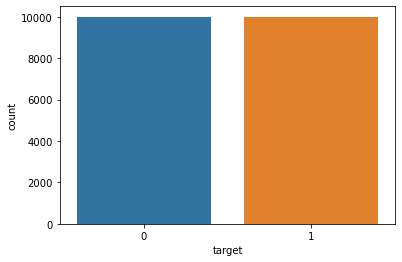

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='target', data=df)

In [63]:
import string
import re
import nltk

stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

def clean_text(text):
    # remove punctuatinos
    text  = ''.join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)

    # tokenization
    text = re.split('\W+', text)

    # remove stopwords
    text = [word for word in text if word not in stopword]

    # stemming and lemmatization
    text = [ps.stem(word) for word in text]
    text = [wn.lemmatize(word) for word in text]

    return ' '.join(text)

df['text'] = df['text'].apply(lambda x: clean_text(x))
df.head()

,target,text
0,0,upset cant updat facebook text might cri resul...
1,0,kenichan i dive mani time ball manag save the ...
2,0,whole bodi feel itchi like fire
3,0,nationwideclass behav im mad i cant see
4,0,kwesidei whole crew


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

tfidf_matrix = tfidf.fit_transform(df['text'].values.astype('U'))

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['target'], test_size=0.2)

In [67]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

C:\Users\iride\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[23:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
import numpy as np
from sklearn.metrics import f1_score

pred = model.predict_proba(X_test)
pred_int = (pred[:, 1] >= 0.3).astype(int)

score = f1_score(y_test, pred_int)
print('Test F1 score: {}'.format(score))

Test F1 score: 0.7355919003115265


<AxesSubplot:ylabel='count'>

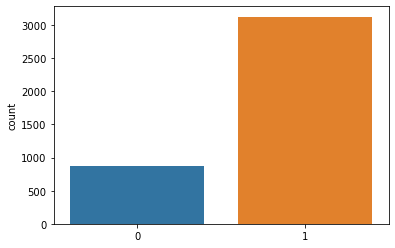

In [69]:
pred = model.predict_proba(X_test)
pred_int = (pred[:, 1] >= 0.3).astype(int)

sns.countplot(x=pred_int)

In [70]:
test_df = pd.read_csv('data.csv', usecols=['text_original'])
test_df.head()

,text_original
0,I love how hes carrying the theme of his car
1,You don't have to charge the mouse that often ...
2,got the mini. I never hear it. only had one is...
3,windows 11 iso leaked try it (nxt vid on this)
4,windows 11 iso leaked try it (nxt vid on this)


In [71]:
test_df['text_original'] = test_df['text_original'].apply(lambda x: clean_text(x))
test_df.head()

,text_original
0,i love he carri theme car
1,you dont charg mous often anyway charg overnig...
2,got mini i never hear one issu motu legaci aud...
3,window iso leak tri nxt vid
4,window iso leak tri nxt vid


<AxesSubplot:ylabel='count'>

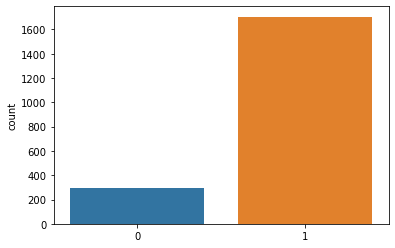

In [72]:
test_tfidf = tfidf.fit_transform(test_df['text_original'].values.astype('U'))

pred = model.predict_proba(test_tfidf)
pred_int = (pred[:, 1] >= 0.3).astype(int)

sns.countplot(x=pred_int)